In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#Load the dataset in Python environment
data = pd.read_csv('/content/test_loan.csv')

In [10]:
# Display the  rows of the training dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [11]:
#a.. Missing value handling
data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [12]:
# Handle missing values
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7b2dccbcfdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b2dccc00340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b2dccbcfb20>],
 'medians': [<matplotlib.lines.Line2D at 0x7b2dccc00880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b2dccc00b20>],
 'means': []}

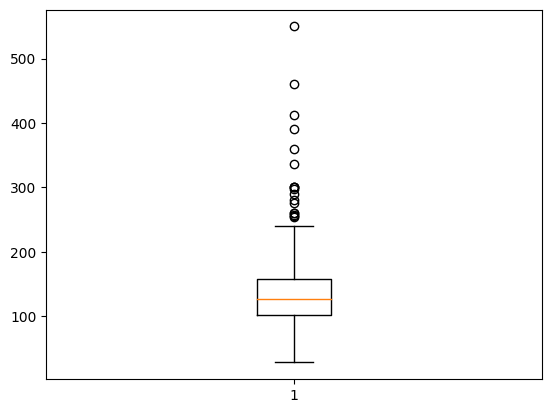

In [14]:
#. Outlier detection
plt.boxplot(data['LoanAmount'])

In [15]:
Q1 = np.percentile(data['LoanAmount'],25,method='midpoint')
Q3 = np.percentile(data['LoanAmount'],75,method='midpoint')
IQR = Q3 - Q1
l1 = Q1 - 1.5 * IQR
l3 = Q3 + 1.5 * IQR
outliers = []
for val in data['LoanAmount']:
  if val>l3 or val<l1:
    outliers.append(val)
outliers= data[((data['LoanAmount'] < l1) | (data['LoanAmount'] > l3))]
print(outliers)

      Loan_ID  Gender Married Dependents Education Self_Employed  \
8    LP001059    Male     Yes          2  Graduate            No   
18   LP001108    Male     Yes          0  Graduate            No   
24   LP001149    Male     Yes          0  Graduate            No   
27   LP001169    Male     Yes          0  Graduate            No   
81   LP001428    Male     Yes         3+  Graduate            No   
83   LP001446    Male     Yes          0  Graduate            No   
91   LP001483    Male     Yes         3+  Graduate            No   
96   LP001500    Male     Yes          1  Graduate            No   
124  LP001655  Female      No          0  Graduate            No   
143  LP001791    Male     Yes          0  Graduate           Yes   
144  LP001794    Male     Yes          2  Graduate           Yes   
189  LP002059    Male     Yes          2  Graduate            No   
194  LP002077    Male     Yes          1  Graduate            No   
284  LP002570  Female     Yes          2  Gradua

In [17]:
#encoding
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
data_encoded

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,0,5720,0,110.0,360.0,1.0,1,1,0,0,0,1
1,LP001022,1,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1
2,LP001031,2,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1
3,LP001035,2,2340,2546,100.0,360.0,1.0,1,1,0,0,0,1
4,LP001051,0,3276,0,78.0,360.0,1.0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,3+,4009,1777,113.0,360.0,1.0,1,1,1,1,0,1
363,LP002975,0,4158,709,115.0,360.0,1.0,1,1,0,0,0,1
364,LP002980,0,3250,1993,126.0,360.0,1.0,1,0,0,0,1,0
365,LP002986,0,5000,2393,158.0,360.0,1.0,1,1,0,0,0,0


In [18]:
#scaling
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
data[numerical_cols] = min_max.fit_transform(data[numerical_cols].fillna(data[numerical_cols].mean()))
print(data)

      Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.078865           0.000000    0.157088          0.746835   
1